<a href="https://colab.research.google.com/github/seonae0223/Deep_Learning/blob/main/01_CNN_%EB%A0%88%EC%9D%B4%EC%96%B4_%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets, transforms
import torch

# 데이터 세트
train_ds = datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
test_ds  = datasets.MNIST(root='data', train=False, transform=transforms.ToTensor(), download=True)

# 데이터 로더
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True)

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7f3054e8c280>
Traceback (most recent call last):
  File "/usr/lib/python3.10/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50930092.21it/s]


Extracting /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1859049.94it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13847042.23it/s]


Extracting /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2838701.95it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/DL/CNN/data/MNIST/raw



In [ ]:
# 데이터 로더에서 이미지를 1장만 로딩합니다.
images, labels = next(iter(train_dl))
images.shape

torch.Size([64, 1, 28, 28])

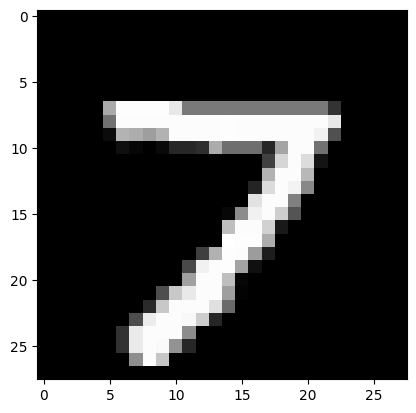

In [ ]:
# 첫 번째 이미지만 시각화 합니다.
import matplotlib.pyplot as plt
plt.imshow(images[0].squeeze(), cmap='gray')
plt.show()

# Conv2D 레이어 사용하기

In [ ]:
import torch.nn as nn

conv_layer = nn.Conv2d(
    in_channels=1, # 입력 이미지(input feature map)의 채널
    out_channels=5, # 출력 이미지(output feature map)의 채널 -> 필터의 개수
    kernel_size=3
)

conv_layer

Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
# (N, C, H, W) 형식으로 입력
input_image = images[:1, :, :, :]
input_image.shape

torch.Size([1, 1, 28, 28])

In [ ]:
conv_out = conv_layer(input_image)
conv_out.shape

torch.Size([1, 5, 26, 26])

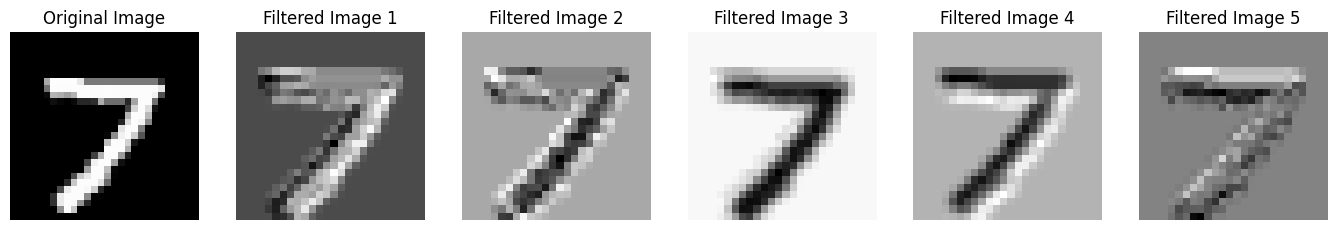

In [ ]:
# conv 레이어를 지나간 각 이미지를 시각화 합니다.
conv_out_images = conv_out[0]

fig, axes = plt.subplots(1, 6, figsize=(17, 3))

axes[0].imshow(images[0, ...].squeeze(), cmap='gray')
axes[0].title.set_text('Original Image')
axes[0].axis('off')

for idx, ax in enumerate(axes[1:]):
    ax.imshow(conv_out_images[idx, ...].detach().squeeze(), cmap='gray')
    ax.axis('off')
    ax.title.set_text(f'Filtered Image {idx+1}')
plt.show()

## Filter 시각화

In [ ]:
filters = conv_layer.weight
filters.shape # (C_out, C_in, H_k, W_k)

torch.Size([5, 1, 3, 3])

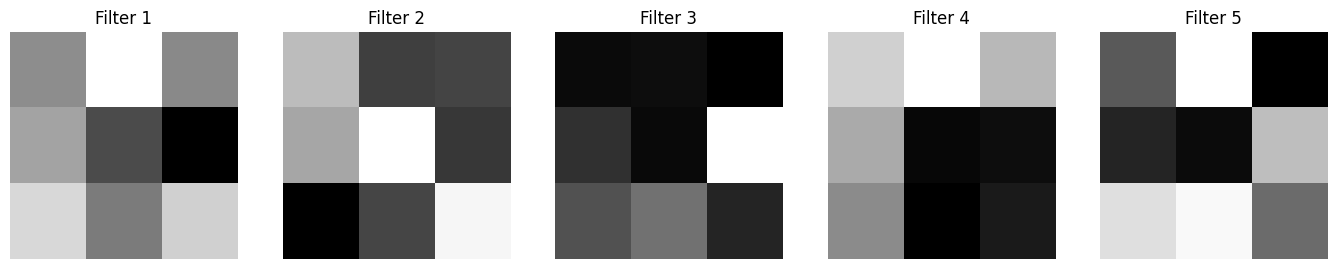

In [ ]:
# 시각화
fig, axes = plt.subplots(1, 5, figsize=(17, 3))

for idx, ax in enumerate(axes):
    ax.imshow(filters[idx, 0, ...].detach().squeeze(), cmap='gray')
    ax.title.set_text(f'Filter {idx+1}')
    ax.axis('off')
plt.show()